In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install gymnasium
!pip install stable-baselines3
!pip install torch
!pip install numpy
!pip install matplotlib

In [1]:
import gymnasium as gym
from gymnasium.wrappers import GrayScaleObservation, ResizeObservation, FrameStack

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv, VecTransposeImage
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.logger import HParam
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback, CallbackList

from typing import Optional

import numpy as np
import matplotlib.pyplot as plt

import math

import os

In [2]:
# Matplotlib-Konfiguration
plt.rcParams['axes.axisbelow'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

# Preprocess Environment

In [3]:
frameskip = 3

game = "ALE/Pacman-v5"
env = gym.make(game, frameskip=frameskip)

obs = env.reset()

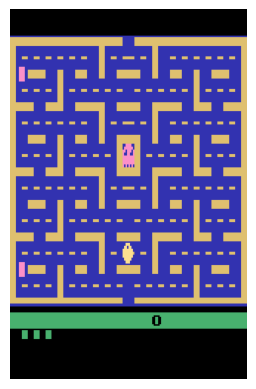

In [4]:
plt.imshow(obs[0])
plt.show()

## Grayscaling

In [5]:
env = GrayScaleObservation(env, keep_dim=True)
obs = env.reset()

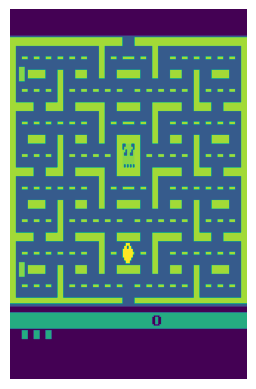

In [6]:
plt.imshow(obs[0])
plt.show()

## Resizing

In [7]:
env = ResizeObservation(env, 84)
obs = env.reset()

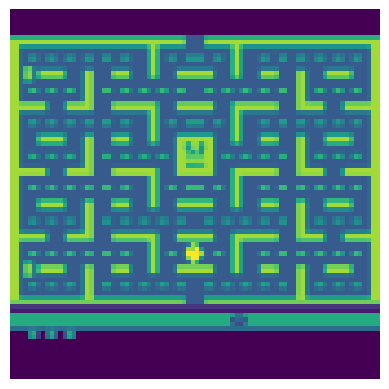

In [8]:
plt.imshow(obs[0])
plt.show()

## Frame-Stacking

In [9]:
frame_stack = 4

env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, frame_stack, channels_order="last")

obs = env.reset()
for i in range(100):
    obs, reward, done, info = env.step([1])

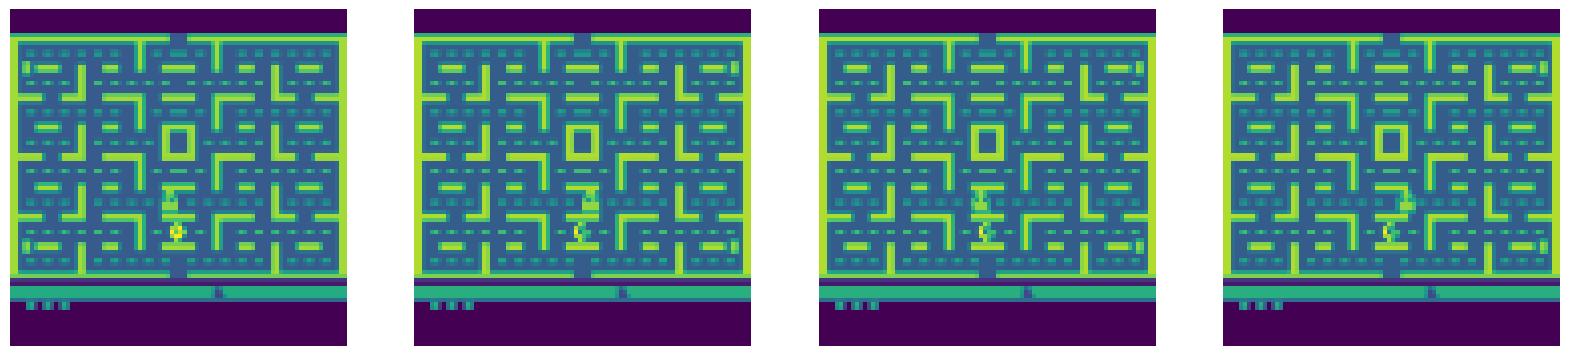

In [10]:
plt.figure(figsize=(20,16))
for idx in range(obs.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(obs[0][:,:,idx])
plt.show()